## Constructing a Bayesian network to demonstrate the diagnosis of heart patients using the standard Heart Disease Data Set.


In [1]:
import pandas as pd

### Loading the data

In [2]:
df = pd.read_csv("heart_disease.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Data Preprocessing

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df = df.drop(columns=['ChestPainType', 'MaxHR', 'Oldpeak', 'ST_Slope'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Sex', 'RestingECG', 'ExerciseAngina']
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,HeartDisease
0,40,1,140,289,0,1,0,0
1,49,0,160,180,0,1,0,1
2,37,1,130,283,0,2,0,0
3,48,0,138,214,0,1,1,1
4,54,1,150,195,0,1,0,0


C:\Users\SHRINIVAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Cholesterol'>

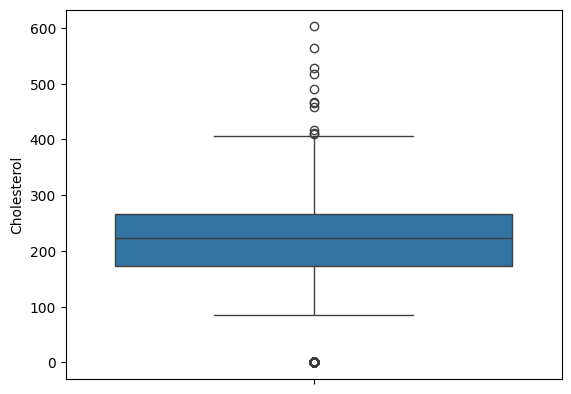

In [11]:
import seaborn as sns
sns.boxplot(df['Cholesterol'])

C:\Users\SHRINIVAS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='RestingBP'>

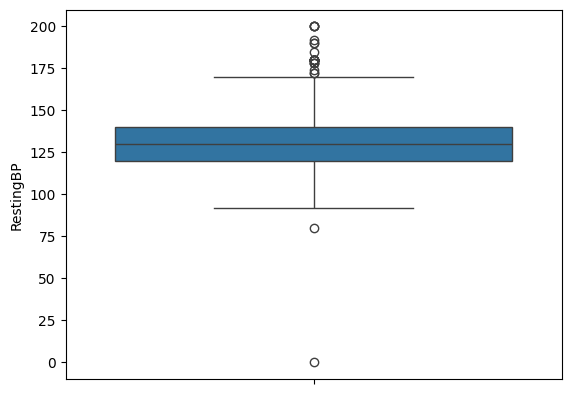

In [12]:
sns.boxplot(df['RestingBP'])

In [13]:
# Remove rows where Cholesterol or RestingBP is 0
df = df[(df['Cholesterol'] != 0) & (df['RestingBP'] != 0)]

### Discretizing continuous data

In [14]:
age_bins = [0, 30, 40, 50, 60, 100]  
age_labels = ['0-30', '31-40', '41-50', '51-60', '>60']

bp_bins = [0, 80, 90, 100, 110, 120, 130, 140, 180, 200]  
bp_labels = ['<80', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '>=150']

chol_bins = [0, 200, 240, 300, 600]  
chol_labels = ['<200', '200-239', '240-299', '>=300']

df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df['RestingBP'] = pd.cut(df['RestingBP'], bins=bp_bins, labels=bp_labels, right=False)
df['Cholesterol'] = pd.cut(df['Cholesterol'], bins=chol_bins, labels=chol_labels, right=False)

In [15]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,HeartDisease
0,41-50,1,140-149,240-299,0,1,0,0
1,41-50,0,140-149,<200,0,1,0,1
2,31-40,1,130-139,240-299,0,2,0,0
3,41-50,0,130-139,200-239,0,1,1,1
4,51-60,1,140-149,<200,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

### Constructing the Bayesian Network

In [17]:
from pgmpy.models import BayesianNetwork

from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian Network (nodes and edges)
model = BayesianNetwork([
    ('Age', 'RestingBP'), 
    ('Sex', 'RestingBP'), 
    ('RestingBP', 'HeartDisease'),
    ('FastingBS', 'HeartDisease'),
    ('HeartDisease', 'RestingECG'),
    ('HeartDisease', 'Cholesterol')
])

C:\Users\SHRINIVAS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
model.nodes()

NodeView(('Age', 'RestingBP', 'Sex', 'HeartDisease', 'FastingBS', 'RestingECG', 'Cholesterol'))

In [19]:
model.edges()

OutEdgeView([('Age', 'RestingBP'), ('RestingBP', 'HeartDisease'), ('Sex', 'RestingBP'), ('HeartDisease', 'RestingECG'), ('HeartDisease', 'Cholesterol'), ('FastingBS', 'HeartDisease')])

### Visualizing the Bayesian Network

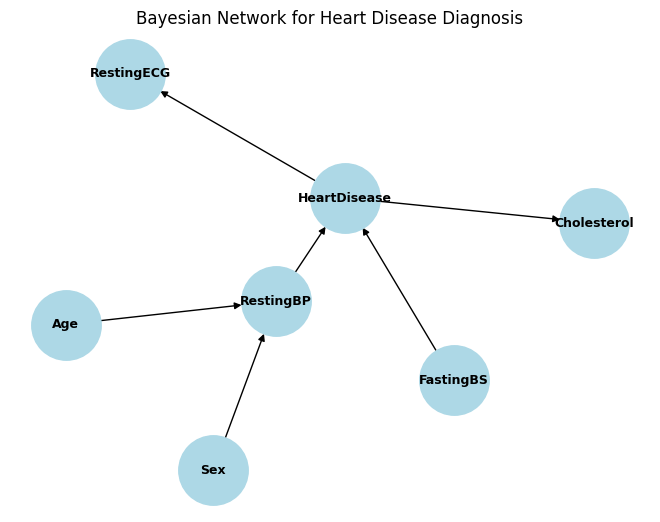

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

graph = nx.DiGraph()

# Adding edges to the graph
for edge in model.edges():
    graph.add_edge(edge[0], edge[1])

pos = nx.spring_layout(graph, k=0.8)  
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=2500, node_color='lightblue', font_size=9, font_weight='bold')
plt.title('Bayesian Network for Heart Disease Diagnosis')
plt.show()

### Estimating conditional probability distributions for each node

In [21]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(train_data, estimator=MaximumLikelihoodEstimator)

In [22]:
for cpd in model.get_cpds():
    print(f"CPD for {cpd.variable}:")
    print(cpd)
    print() 

CPD for Age:
+------------+------------+
| Age(0-30)  | 0.00503356 |
+------------+------------+
| Age(31-40) | 0.0855705  |
+------------+------------+
| Age(41-50) | 0.256711   |
+------------+------------+
| Age(51-60) | 0.416107   |
+------------+------------+
| Age(>60)   | 0.236577   |
+------------+------------+

CPD for RestingBP:
+--------------------+---------------------+-----+---------------------+----------------------+
| Age                | Age(0-30)           | ... | Age(>60)            | Age(>60)             |
+--------------------+---------------------+-----+---------------------+----------------------+
| Sex                | Sex(0)              | ... | Sex(0)              | Sex(1)               |
+--------------------+---------------------+-----+---------------------+----------------------+
| RestingBP(100-109) | 0.14285714285714285 | ... | 0.08333333333333333 | 0.02857142857142857  |
+--------------------+---------------------+-----+---------------------+-----------

### Inferencing with Bayesian Network

In [23]:
from pgmpy.inference import VariableElimination

In [24]:
inference = VariableElimination(model)

In [25]:
result = inference.query(variables=['HeartDisease'], evidence={'Age': '51-60','Cholesterol': '>=300','RestingBP': '130-139'})
print(result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4902 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5098 |
+-----------------+---------------------+


In [26]:
evidence = {
    'Age': '51-60',          
    'Cholesterol': '200-239',  
    'RestingBP': '130-139',    
    'FastingBS': 1,    
    'Sex': 1,          
    'RestingECG': 1    
}
result = inference.query(variables=['HeartDisease'], evidence=evidence)
print("Probability of Heart Disease given the evidence:")
print(result)

Probability of Heart Disease given the evidence:
+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.3186 |
+-----------------+---------------------+
| HeartDisease(1) |              0.6814 |
+-----------------+---------------------+


### Evaluating the Model

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [28]:
# Separate features (X) and labels (y)
X_test = test_data[['Age', 'Cholesterol', 'RestingBP', 'FastingBS', 'Sex', 'RestingECG']]
y_test = test_data['HeartDisease']  

In [29]:
y_pred = []
y_pred_prob = []
# Loop through the test data and make predictions
for index, row in X_test.iterrows():
    age = row['Age']
    chol = row['Cholesterol']
    bp = row['RestingBP']
    bs = row['FastingBS']
    sex = row['Sex']
    ecg = row['RestingECG']
    evidence = {
    'Age': age,          
    'Cholesterol': chol,  
    'RestingBP': bp,    
    'FastingBS': bs,    
    'Sex': sex,          
    'RestingECG': ecg   
    }
    result = inference.query(variables=['HeartDisease'], evidence=evidence)
    prob_heart_disease = result.values[1]  # Get the probability of HeartDisease = 1
    y_pred_prob.append(prob_heart_disease)
    
    # Apply threshold to classify
    y_pred.append(1 if prob_heart_disease >= 0.5 else 0)

In [30]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f} \nRecall: {recall:.2f} \nF1 Score: {f1:.2f}')

Precision: 0.72 
Recall: 0.52 
F1 Score: 0.60


In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.77      0.67        71
           1       0.72      0.52      0.60        79

    accuracy                           0.64       150
   macro avg       0.66      0.65      0.64       150
weighted avg       0.66      0.64      0.64       150



### Visualizing Model Performance

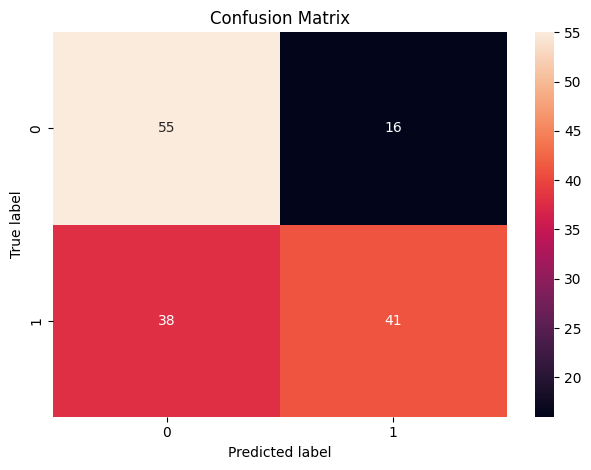

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True, fmt='g')
plt.title('Confusion Matrix')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC score: {roc_auc}')

ROC-AUC score: 0.6882688536280975


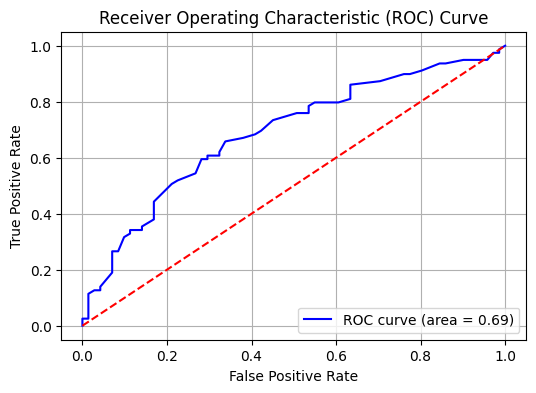

In [34]:
# Plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()